# Data Warehousing and Data Mining

## Tutorial 1

### Student Details
Name : Krunal Rank

Adm. No. : U18CO081

In [ ]:
import pandas as pd
import math
from copy import deepcopy
from pyod.models.hbos import HBOS

print("Imports loaded")

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

In [28]:
file_name = "Histograms.csv"

file_name

'Histograms.csv'

In [29]:
# load dataset into pandas df
df = pd.read_csv(file_name)
df.head()

,A,B,C,D,Left Skew,Multimodal,IQ20,IQ100
0,48.916926,67.223785,55.917225,45.561471,23.1,37.632318,120.459951,93.041368
1,47.692726,68.175751,30.174288,47.825783,18.2,49.244001,107.418864,93.806158
2,48.629579,61.753451,43.641583,59.699370,14.6,37.780203,95.006312,135.339681
3,58.544034,69.783507,53.738745,45.704638,21.2,56.827208,96.522192,100.772632
4,44.821338,70.730153,67.829659,44.254419,24.5,54.513731,108.878563,91.600053


### 1. Generate the histograms for the frequency of values in the dataset uploaded to the classroom and study statistical characteristics like Mean, Mode, Median, Variance of any sample (Histograms can be generated in Excel/Python/Orange, etc).

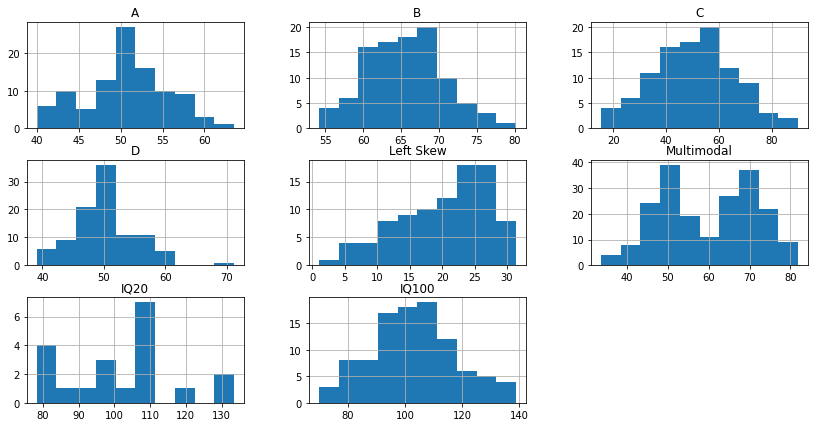

In [30]:
# histograms
hist = df.hist(figsize=[14,7])

In [31]:
# mean, median, mode, variance for all columns
print(f"Mean\n{df.mean()}")
print("")
print(f"Median\n{df.median()}")
print("")
print(f"Variance\n{df.var()}")

Mean
A              50.632133
B              65.544513
C              50.851334
D              50.211539
Left Skew      20.107609
Multimodal     59.734576
IQ20          102.132401
IQ100         102.925179
dtype: float64

Median
A              50.673711
B              65.898797
C              51.654882
D              49.726685
Left Skew      21.500000
Multimodal     60.602041
IQ20          105.608402
IQ100         101.426575
dtype: float64

Variance
A              25.635211
B              25.861999
C             235.387254
D              27.339516
Left Skew      49.665985
Multimodal    132.553093
IQ20          241.831182
IQ100         231.757566
dtype: float64


### 2. Perform skewness analysis for the data and decide the suitable missing valuereplacement for the ratio scale and interval scale numerical data attributes.

In [32]:
# skewness analysis
print(f"Skewness\n{df.skew()}")
print("")
# kurtosis analysis
print(f"Kurtosis\n{df.kurt()}")

# As you can see in the below data, the absolute skewness of D and Left Skew is fairly high and requires use of median
# instead of usual mean to fill NaN values
# 

Skewness
A            -0.060298
B             0.166426
C            -0.036257
D             0.662782
Left Skew    -0.615309
Multimodal   -0.043677
IQ20          0.274567
IQ100         0.249707
dtype: float64

Kurtosis
A            -0.292248
B             0.063429
C            -0.304000
D             1.711042
Left Skew    -0.499210
Multimodal   -1.164263
IQ20         -0.297661
IQ100        -0.278870
dtype: float64


### 3. Perform Missing value replacement by Mean, Mode, Median on the A attributes. Intentionally remove two values from that attribute and find the value of the X and Y for given data using mean value replacement (perform the operation on first 12 records).

array([[<AxesSubplot:title={'center':'without replacement'}>,
        <AxesSubplot:title={'center':'with replacement'}>]], dtype=object)

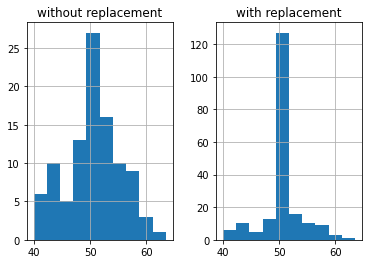

In [33]:
# replacing with mean values
col_a_mean = deepcopy(df["A"])
mean = df["A"].mean()
col_a_mean = col_a_mean.fillna(mean)
mean_df = pd.DataFrame({"without replacement":df["A"],"with replacement":col_a_mean})

mean_df.hist()

array([[<AxesSubplot:title={'center':'without replacement'}>,
        <AxesSubplot:title={'center':'with replacement'}>]], dtype=object)

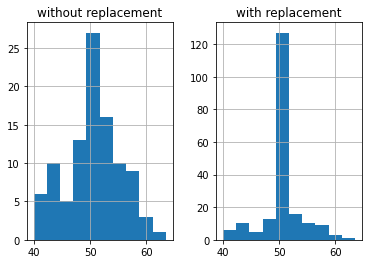

In [34]:
# replacing with median values
col_a_median = deepcopy(df["A"])
median = df["A"].median()
col_a_median = col_a_median.fillna(median)
median_df = pd.DataFrame({"without replacement":df["A"],"with replacement":col_a_median})

median_df.hist()

array([[<AxesSubplot:title={'center':'without replacement'}>,
        <AxesSubplot:title={'center':'with replacement'}>]], dtype=object)

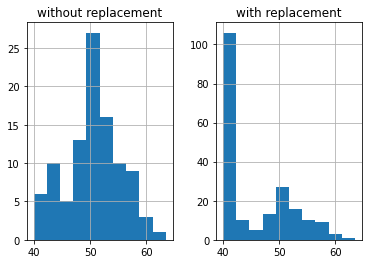

In [35]:
# replacing with mode values
col_a_mode = deepcopy(df["A"])
mode = df["A"].mode()[0]
col_a_mode = col_a_mode.fillna(mode)
mode_df = pd.DataFrame({"without replacement":df["A"],"with replacement":col_a_mode})

mode_df.hist()

In [36]:
# filling missing values using mean by replacing 2 known values to None and then calculating RMSE
col_a = deepcopy(df["A"])
col_a[0] = col_a[1] = None

col_a = col_a.fillna(col_a.mean())

rmse = 0
for i in range(2):
    rmse += (col_a[i] - df["A"][i])**2

rmse **= 0.5
rmse /= 2
print(f'Original Values: {df["A"][0]} {df["A"][1]}')
print(f'Generated Values: {col_a[0]} {col_a[1]}')
print(f"RMSE After Mean Replacement for First 2 values : {rmse}")

Original Values: 48.91692627 47.69272613
Generated Values: 50.67962923000001 50.67962923000001
RMSE After Mean Replacement for First 2 values : 1.7341216691730785


In [37]:
# filling missing values using mean by replacing 2 known values to None and then calculating RMSE
col_a = deepcopy(df["A"])

for i in range(12):
    col_a[i] = None
col_a = col_a.fillna(col_a.mean())

rmse = 0
for i in range(12):
    rmse += (col_a[i] - df["A"][i])**2

rmse **= 0.5
rmse /= 2
print(f'Original Values')
for i in range(12):
    print(f'df["A"][{i}] : {df["A"][i]}')
print(f'Generated Values')
for i in range(12):
    print(f'col_a[{i}] : {col_a[i]}')
print(f"RMSE After Mean Replacement for First 12 values : {rmse}")

Original Values
df["A"][0] : 48.91692627
df["A"][1] : 47.69272613
df["A"][2] : 48.6295795
df["A"][3] : 58.5440342
df["A"][4] : 44.82133762
df["A"][5] : 47.69350376
df["A"][6] : 43.95443412
df["A"][7] : 52.84905452
df["A"][8] : 47.93471606
df["A"][9] : 63.53148348
df["A"][10] : 49.80409903
df["A"][11] : 52.18302422
Generated Values
col_a[0] : 50.64384543215909
col_a[1] : 50.64384543215909
col_a[2] : 50.64384543215909
col_a[3] : 50.64384543215909
col_a[4] : 50.64384543215909
col_a[5] : 50.64384543215909
col_a[6] : 50.64384543215909
col_a[7] : 50.64384543215909
col_a[8] : 50.64384543215909
col_a[9] : 50.64384543215909
col_a[10] : 50.64384543215909
col_a[11] : 50.64384543215909
RMSE After Mean Replacement for First 12 values : 9.312407456436615


### 4. Perform Noise identification, Outlier detection using histogram and try to remove the outliers and check the statistical characteristics again.

In [48]:
new_df = deepcopy(df)
skewed_cols = ["D","Left Skew"]
for col in new_df.columns:
    if col in skewed_cols:
        new_df[col] = new_df[col].fillna(new_df[col].median())
    else:
        new_df[col] = new_df[col].fillna(new_df[col].mean())



In [49]:
record_count = len(new_df)
bin_size = math.ceil(record_count**0.5)

print(f"No. of Records : {record_count}")
print(f"Bin Size for Histograms : {bin_size}")

No. of Records : 200
Bin Size for Histograms : 15


In [50]:
# hbos = Histogram Based Outlier Score
hbos = HBOS(n_bins=bin_size)

hbos.fit(new_df)
output = hbos.decision_function(new_df)


new_df["Anomaly"] = hbos.predict(new_df)

# Records that are possible Anomalies
new_df[new_df["Anomaly"] == 1]

,A,B,C,D,Left Skew,Multimodal,IQ20,IQ100,Anomaly
1,47.692726,68.175751,30.174288,47.825783,18.2,49.244001,107.418864,93.806158,1
2,48.629579,61.753451,43.641583,59.699370,14.6,37.780203,95.006312,135.339681,1
3,58.544034,69.783507,53.738745,45.704638,21.2,56.827208,96.522192,100.772632,1
4,44.821338,70.730153,67.829659,44.254419,24.5,54.513731,108.878563,91.600053,1
5,47.693504,63.002345,58.796386,58.919273,24.9,47.876070,108.488800,105.969921,1
6,43.954434,54.451451,63.025524,44.086329,27.4,48.755803,109.344148,93.866104,1
8,47.934716,74.690423,31.758708,47.967768,24.2,58.907958,84.488598,110.123194,1
9,63.531483,75.704799,23.780607,48.368597,20.6,58.405534,83.672763,128.924255,1
11,52.183024,72.933634,71.122767,53.595887,19.1,50.776997,104.137603,130.364024,1
15,50.250865,59.395780,90.095257,47.120198,12.0,40.333273,100.275924,86.800080,1


In [55]:
new_df = new_df[new_df.Anomaly != 1]
new_df = new_df.drop("Anomaly",axis = 1)
# mean, median, mode, variance for all columns
print(f"Mean\n{new_df.mean()}")
print("")
print(f"Median\n{new_df.median()}")
print("")
print(f"Variance\n{new_df.var()}")

Mean
A              50.785570
B              65.376997
C              50.207973
D              49.883500
Left Skew      21.233889
Multimodal     60.767580
IQ20          102.196998
IQ100         102.782607
dtype: float64

Median
A              50.632133
B              65.544513
C              50.851334
D              49.726685
Left Skew      21.500000
Multimodal     63.607973
IQ20          102.132401
IQ100         102.925179
dtype: float64

Variance
A              10.536062
B               9.677995
C              97.030257
D              11.597258
Left Skew      17.788063
Multimodal    131.986012
IQ20           12.676367
IQ100         100.891334
dtype: float64
